### ASSIGNMENT - 14
### Topic - Decision Tree Company Problem
### By Tushar N. Mondkar (Batch of 27 March,Andheri)
### Mentor - Jayantilal Sir

__Q. A cloth manufacturing company is interested to know about the segment or attributes causes high sale.__

In [51]:
# importing necessary packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score
from sklearn.tree import DecisionTreeRegressor

In [52]:
data = pd.read_csv("Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [53]:
#Checking of null values and data_type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [54]:
#Creating copy of data
data1 = data.copy()

In [55]:
# changing target variable to catogerical data

data1["sales"]="small"
data1.loc[data1["Sales"]>7.49,"sales"]="large"
data1.drop(["Sales"],axis=1,inplace=True)

In [56]:
#One-hot encoding

data1['US'] = data1['US'].map({'Yes':1,'No': 0})
data1['Urban'] = data1['Urban'].map({'Yes':1,'No': 0})
data1['ShelveLoc'] = data1['ShelveLoc'].map({'Bad':0,'Good':2,'Medium':1})
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,large
1,111,48,16,260,83,2,65,10,1,1,large
2,113,35,10,269,80,1,59,12,1,1,large
3,117,100,4,466,97,1,55,14,1,1,small
4,141,64,3,340,128,0,38,13,1,0,small


In [57]:
# spliting the data into train and test 

x = data1.iloc[:,0:10]
y = data1.iloc[:,10]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 40)

In [58]:
# model building

model = DecisionTreeClassifier(criterion='entropy',max_depth = 4) 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

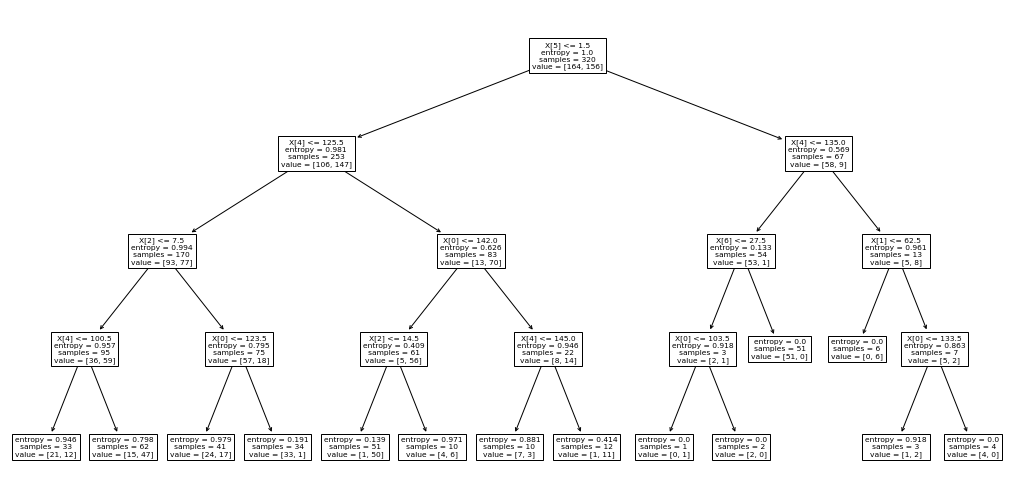

In [59]:
fig = plt.figure(figsize=(18,9))
tree.plot_tree(model)
plt.show()

In [60]:
# predicting on test data set

preds = model.predict(x_test)  
pd.Series(preds).value_counts()

large    45
small    35
dtype: int64

In [61]:
print(preds)

['small' 'large' 'small' 'large' 'small' 'large' 'large' 'large' 'large'
 'large' 'small' 'small' 'large' 'large' 'large' 'large' 'large' 'large'
 'small' 'small' 'large' 'large' 'small' 'large' 'small' 'small' 'large'
 'small' 'large' 'large' 'large' 'large' 'large' 'small' 'large' 'large'
 'small' 'small' 'small' 'small' 'small' 'small' 'small' 'large' 'large'
 'large' 'large' 'small' 'small' 'small' 'small' 'small' 'large' 'large'
 'small' 'large' 'large' 'large' 'large' 'small' 'small' 'large' 'large'
 'small' 'small' 'large' 'large' 'small' 'small' 'large' 'large' 'large'
 'large' 'small' 'large' 'large' 'small' 'small' 'small' 'large']


In [62]:
#Accuracy
accuracy_score(y_test,preds)

0.725

In [63]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':preds})
df

,Actual,Predicted
132,large,small
390,small,large
310,large,small
3,small,large
248,small,small
...,...,...
361,large,large
197,small,small
23,small,small
54,small,small


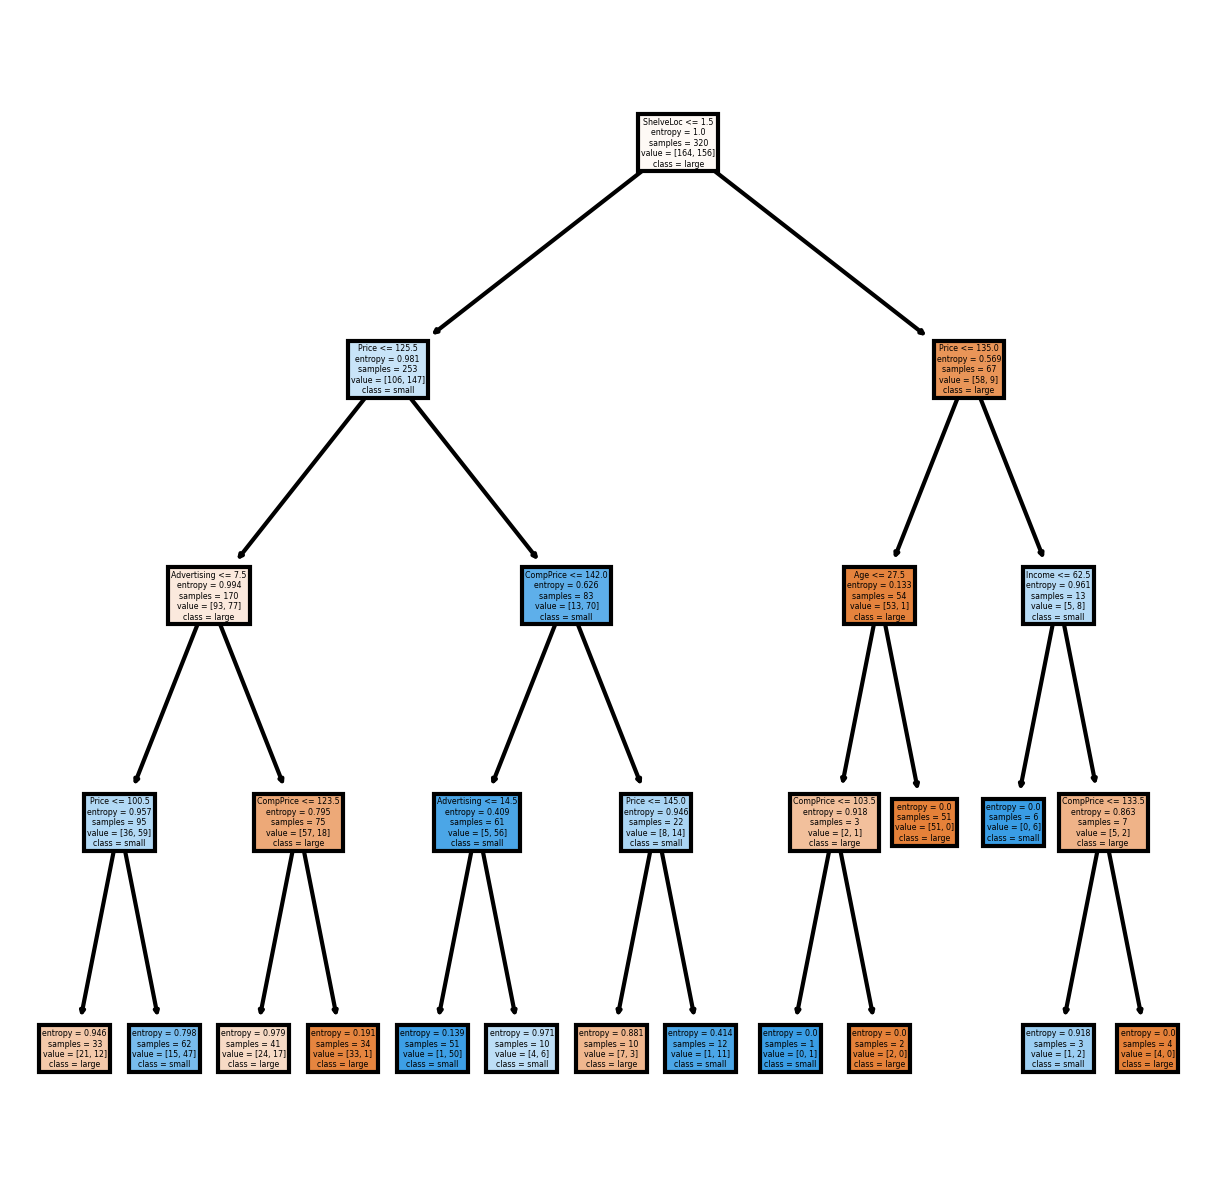

In [64]:
fn=['CompPrice','Income','Advertising' ,'Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['large','small']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [65]:
# Report and confusion matrix

print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[29  6]
 [16 29]]
              precision    recall  f1-score   support

       large       0.64      0.83      0.73        35
       small       0.83      0.64      0.73        45

    accuracy                           0.73        80
   macro avg       0.74      0.74      0.73        80
weighted avg       0.75      0.73      0.73        80



In [66]:
model.feature_importances_

array([0.15858519, 0.04054894, 0.16638752, 0.        , 0.39597293,
       0.21067849, 0.02782694, 0.        , 0.        , 0.        ])

In [67]:
imp = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
imp

,feature,importance
4,Price,0.395973
5,ShelveLoc,0.210678
2,Advertising,0.166388
0,CompPrice,0.158585
1,Income,0.040549
6,Age,0.027827
3,Population,0.000000
7,Education,0.000000
8,Urban,0.000000
9,US,0.000000


__From the table above, we can conclude that "Price" is the most important feature here.__